In [1]:
! mkdir -p ~/.kaggle

In [2]:
!cp kaggle.json ~/.kaggle/

In [4]:
! kaggle datasets download -d START-UMD/gtd

 59% 17.0M/28.7M [00:00<00:00, 57.9MB/s]
100% 28.7M/28.7M [00:00<00:00, 89.2MB/s]


In [5]:
from zipfile import ZipFile
zip_location = 'gtd.zip'
extract_location =  "/content"
zip_ref = ZipFile(zip_location)
zip_ref.extractall(extract_location)

zip_ref.close()

In [6]:
del zip_location
del extract_location

In [7]:
import pandas as pd
import seaborn as sbn
import numpy as np

In [8]:
data = pd.read_csv('data.csv',encoding = 'ISO-8859-1')

<ipython-input-8-0b511bcfbe5a>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data.csv',encoding = 'ISO-8859-1')


In [9]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
data.tail()

In [ ]:
data.info()

In [ ]:
data.columns

In [13]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day',"city":"City",'country_txt':'Country','provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)


In [ ]:
data.head()

In [15]:
data=data[['Year','Month','Day','Country','State','Region','City','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]


In [ ]:
data.head()

In [ ]:
data.describe()

Some observations till now:



1.   The data ranges from the year of 1970 to 2017
2.   It contains useful info like the Dates, Coordinates, Deaths and Wounded counts.
3.   The max deaths in an event were 1570
4.   The max wounded people in an event were 8191









>   **ANALYZING ATTACKS OVER THE YEARS**







In [18]:
attacks_year = data["Year"].value_counts(dropna = False).sort_index().reset_index()
attacks_year.head()

,index,Year
0,1970,651
1,1971,471
2,1972,568
3,1973,473
4,1974,581


In [19]:
attacks_year.head()
attacks_year = attacks_year.rename(columns = {"Year":"Attacks","index":"Year"})


In [20]:
attacks_year.set_index("Year",inplace=True)

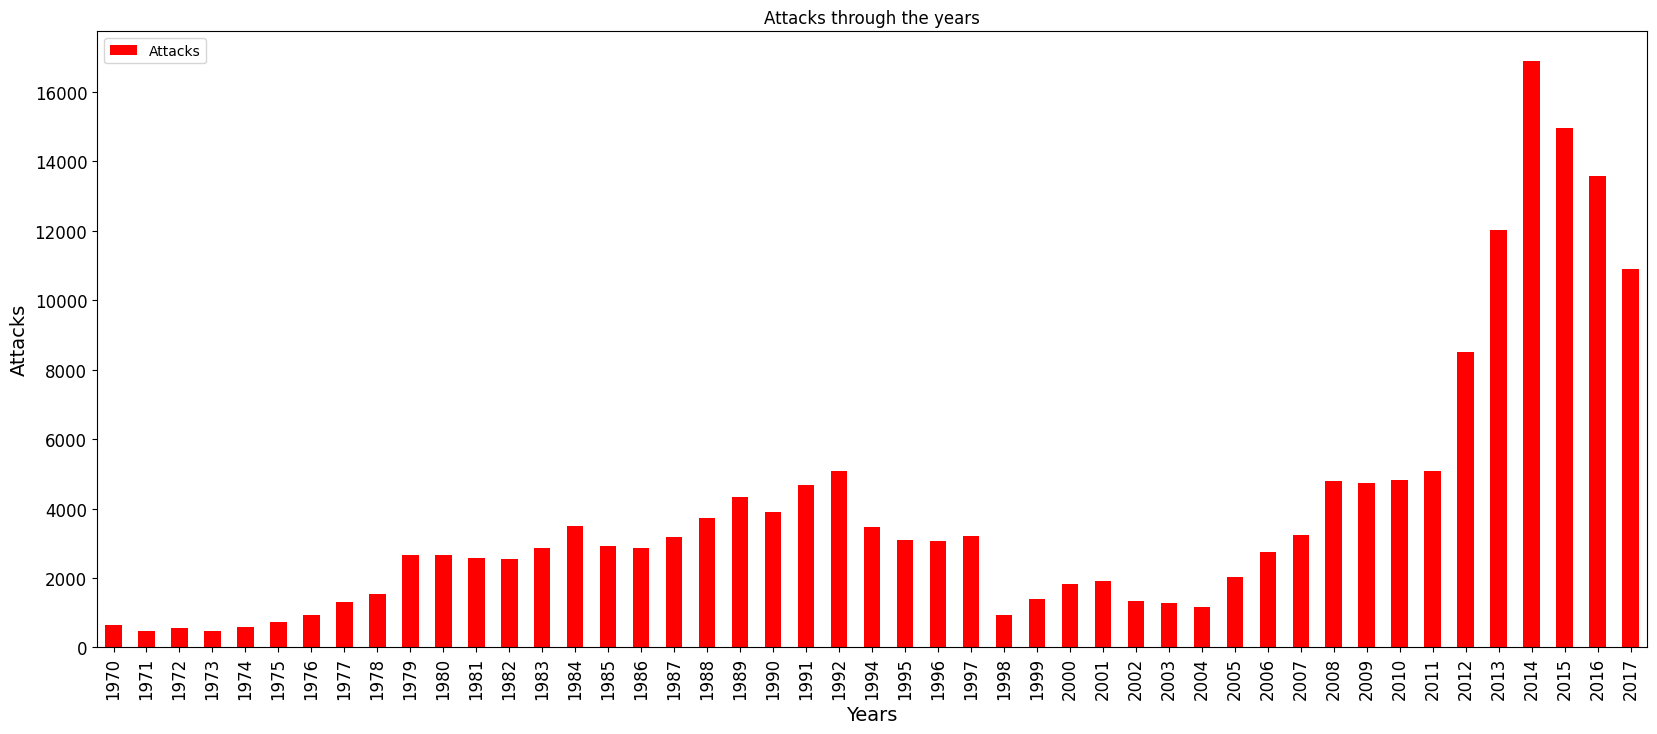

In [21]:
import matplotlib.pyplot as plt
import matplotlib as mpl
attacks_year.plot(kind = "bar",color = "red",figsize = (20,8),fontsize = 12)
plt.title("Attacks through the years")
plt.xlabel("Years",fontsize = 14)
plt.ylabel("Attacks",fontsize = 14)
plt.show()

**ANALYZING REGIONS AND ATTACKS**

In [22]:
region_data = pd.crosstab(data.Year,data.Region)
region_data.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


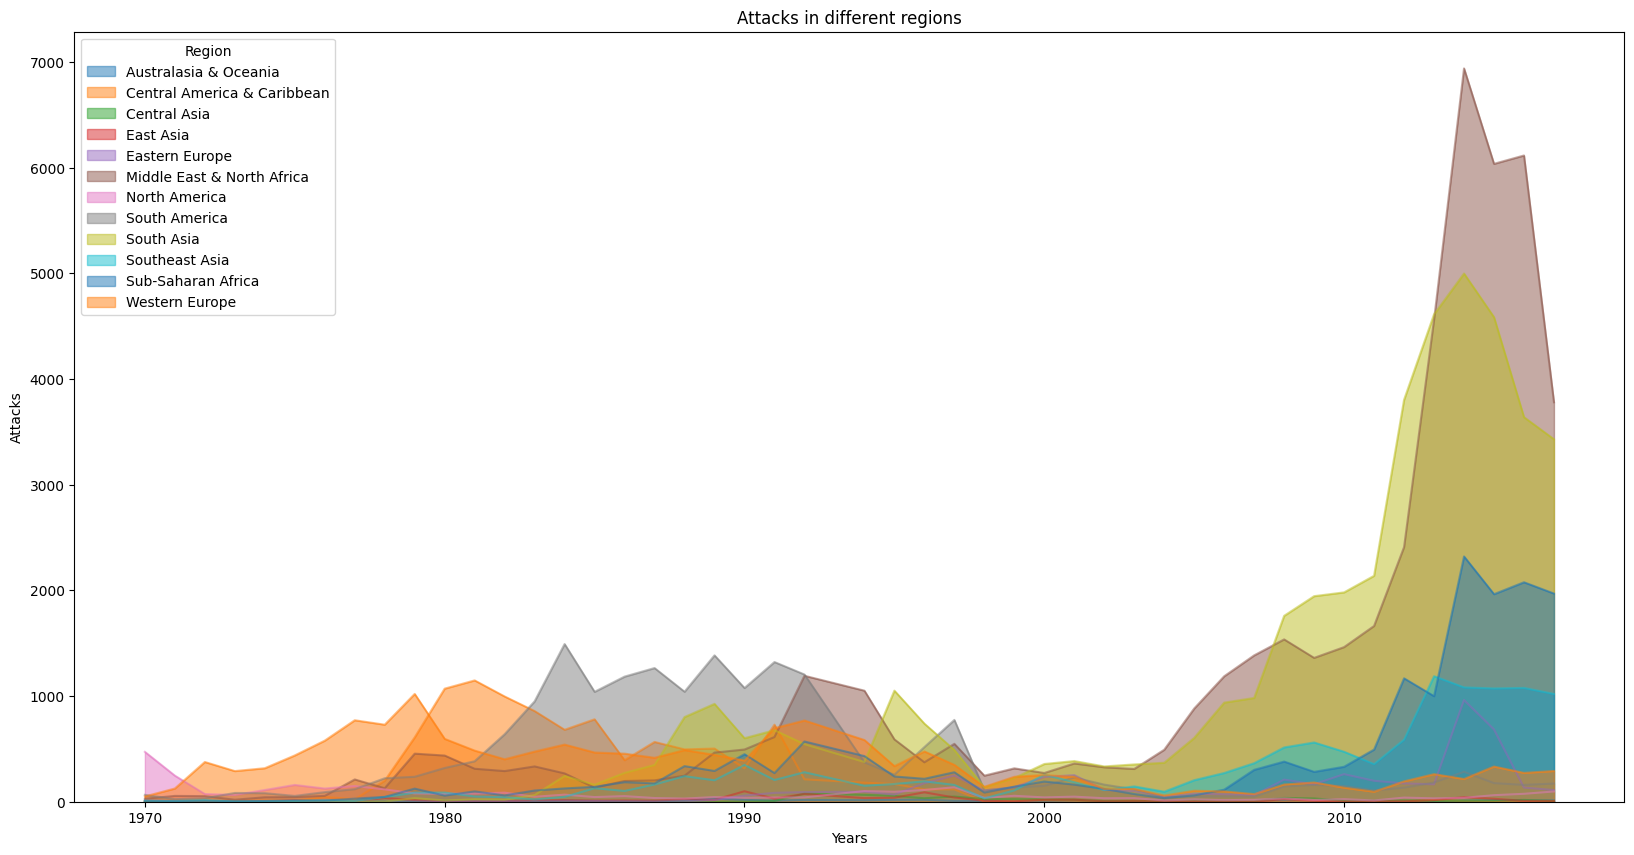

In [23]:
region_data.plot(kind = "area",stacked = False,alpha = 0.5, figsize = (20,10))
plt.title("Attacks in different regions")
plt.xlabel("Years")
plt.ylabel("Attacks")
plt.show()

In [24]:
regionwise = region_data.transpose()
regionwise["Total"] = regionwise.sum(axis = 1)
regions_plot = regionwise["Total"].sort_values(ascending = False)
type(regions_plot)

pandas.core.series.Series

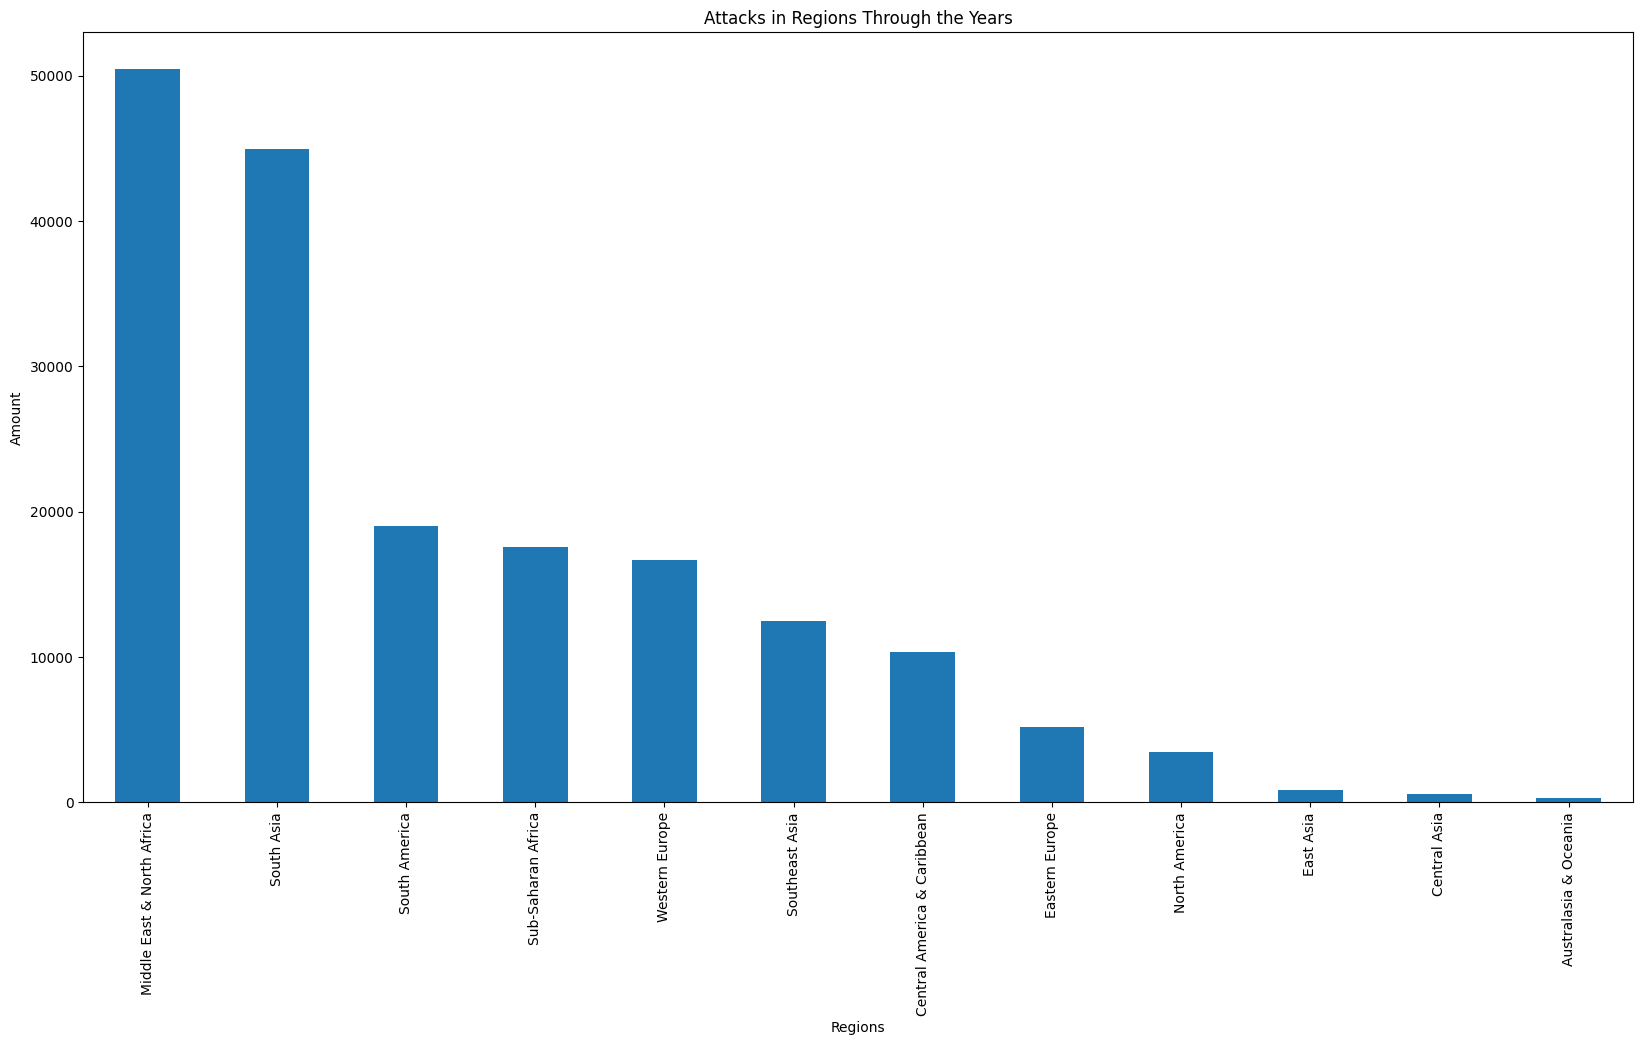

In [25]:
regions_plot.plot(kind = 'bar',figsize = (20,10),title = "Attacks in Regions Through the Years")
plt.xlabel("Regions")
plt.ylabel("Amount")
plt.show()

<ipython-input-26-abd6e857eee4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sbn.heatmap(np.round(data.corr(),2),annot = True, cmap = "coolwarm")


<Axes: >

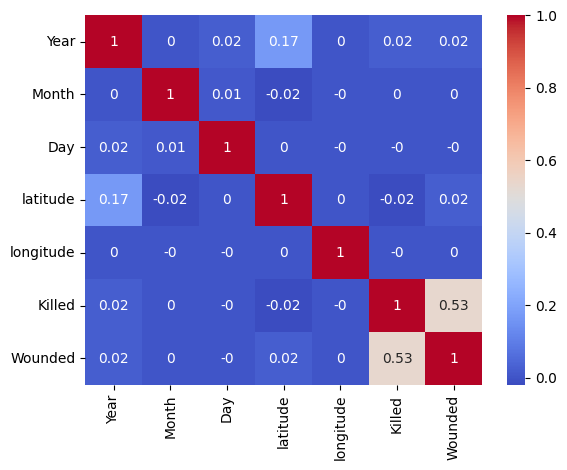

In [26]:
# plt.figure(figsize = (15,10))
sbn.heatmap(np.round(data.corr(),2),annot = True, cmap = "coolwarm")

In [27]:
year_counts = data.Year.value_counts().to_dict()
rate_of_increase = ((year_counts[2017] - year_counts[1970] )/ year_counts[2017]) * 100
print("Attacks in 2017:", year_counts[2017])
print("Attacks in 1970:", year_counts[1970])
print("Rate of Increase in Attacks: ", np.round(rate_of_increase,0))

Attacks in 2017: 10900
Attacks in 1970: 651
Rate of Increase in Attacks:  94.0




*   **Attacks in 2017**: 10900
*   **Attacks in 1970**: 651   
* **Rate of Increase in Attacks**:  94.0




**BY METHODS OF ATTACK**

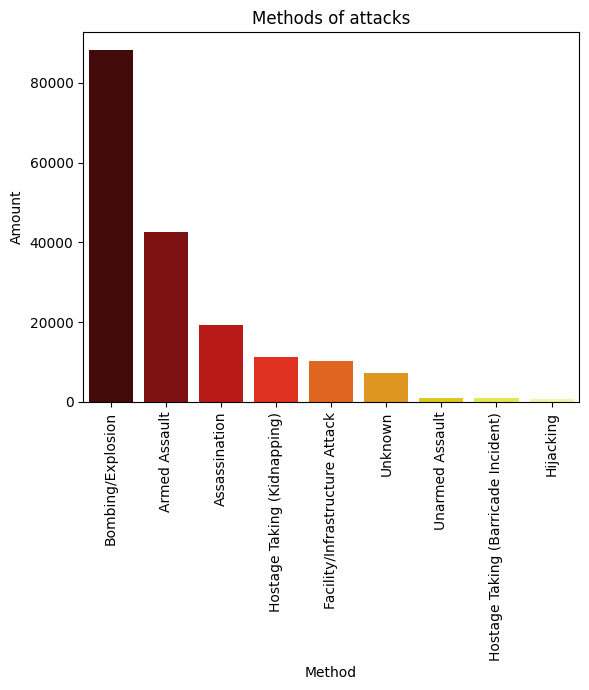

In [28]:
sbn.countplot(data, x = data['AttackType'],order = data["AttackType"].value_counts().index.to_list(),palette = "hot")
plt.xlabel("Method")
plt.ylabel("Amount")
plt.xticks(rotation = 90)
plt.title("Methods of attacks")
plt.show()

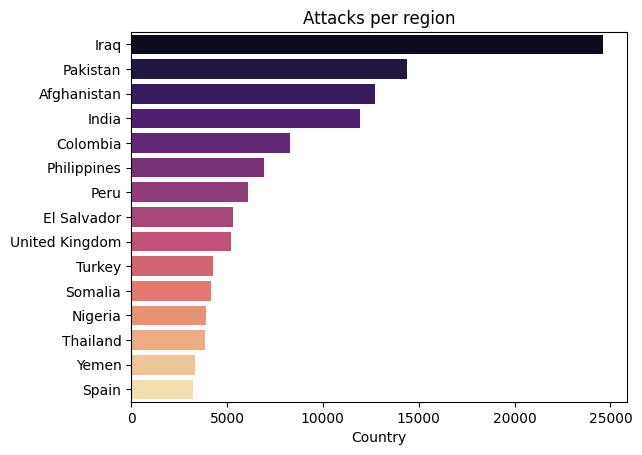

In [29]:
sbn.barplot(x = data['Country'].value_counts()[:15],y = data["Country"].value_counts()[:15].index,palette = 'magma')
plt.title("Attacks per region")
plt.show()

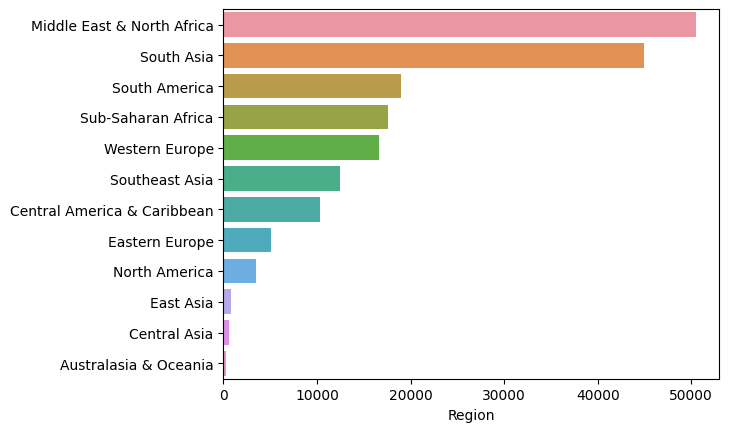

In [30]:
sbn.barplot(x = data['Region'].value_counts()[:15],
            y = data['Region'].value_counts()[:15].index,)

plt.show()

**Group Wise Attack Analysis**

In [36]:
wounded_data  = data[["Group", "Wounded"]].groupby("Group").sum().sort_values(by = "Wounded",ascending = False).drop("Unknown")
wounded_data.head()

,Wounded
Group,
Islamic State of Iraq and the Levant (ISIL),30672.0
Taliban,27932.0
Al-Qaida,24512.0
Liberation Tigers of Tamil Eelam (LTTE),11031.0
Al-Qaida in Iraq,10343.0


In [38]:
killed_data = data[["Group","Killed"]].groupby("Group").sum().sort_values(by = "Killed",ascending = False).drop("Unknown")
killed_data.head()

,Killed
Group,
Islamic State of Iraq and the Levant (ISIL),38923.0
Taliban,29410.0
Boko Haram,20328.0
Shining Path (SL),11601.0
Liberation Tigers of Tamil Eelam (LTTE),10989.0


Text(0, 0.5, 'Wound count')

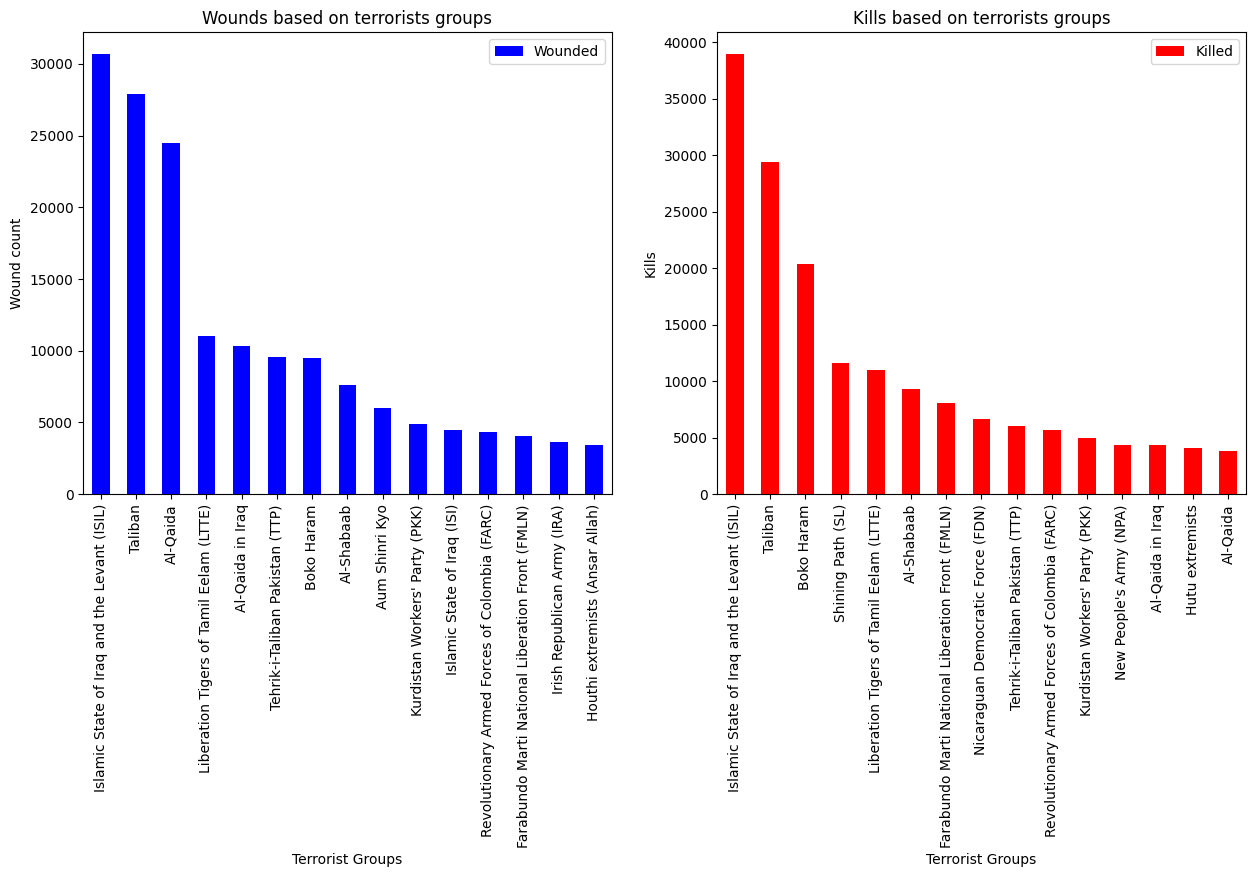

In [42]:
plots = plt.figure()
ax0 = plots.add_subplot(1,2,1)
ax1 = plots.add_subplot(1,2,2)

killed_data[:15].plot(kind = 'bar',color = "red",figsize = (15,6),ax = ax1)
ax1.set_xlabel("Terrorist Groups")
ax1.set_ylabel("Kills")
ax1.set_title("Kills based on terrorists groups")

wounded_data[:15].plot(ax = ax0,kind = 'bar',color = 'blue',figsize= (15,6))
ax0.set_title("Wounds based on terrorists groups")
ax0.set_xlabel("Terrorist Groups")
ax0.set_ylabel("Wound count")

